In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [56]:
(xtr,ytr),(xts,yts) = fashion_mnist.load_data()
y_true = yts

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

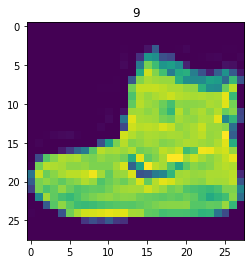

In [4]:
plt.imshow(xtr[0])
plt.title(ytr[0])
plt.show()

In [5]:
print('xtr shape',xtr.shape,sep=':')
print('ytr shape',ytr.shape,sep=':')

xtr shape:(60000, 28, 28)
ytr shape:(60000,)


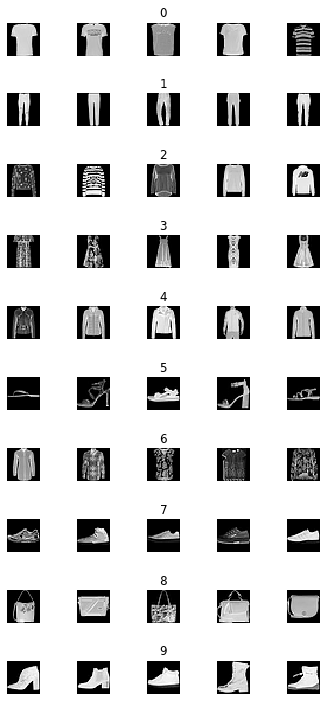

In [6]:
n_cols = 5
n_classes = 10

fig,axes = plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(5,10))
fig.tight_layout()

for i in range(n_cols):
    for j in range(n_classes):
        
        images = xtr[ytr==j]
        selected_image = images[random.randint(0,(len(images)-1)),:,:]
        axes[j][i].imshow(selected_image,cmap='gray')
        axes[j][i].axis('off')
        if i==2:
            axes[j][i].set_title(str(j))

In [65]:
xtr = xtr.reshape(xtr.shape[0],28,28,1)   #(no. of images, height, width,channels)

xtr = xtr/255

In [66]:
xts = xts.reshape(xts.shape[0],28,28,1)
xts = xts/255

In [9]:
from keras.utils.np_utils import to_categorical
ytr = to_categorical(ytr,10)   #10 represents number of classes/categories
yts = to_categorical(yts,10)

In [10]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,zoom_range=0.1, rotation_range=10)

In [48]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [18]:
def create_model():
    model = Sequential()
    model.add(Conv2D(40,kernel_size=(5,5),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = create_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 40)        1040      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 40)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 40)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5760)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               737408    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 739,738
Trainable params: 739,738
Non-trainable params: 0
________________________________________________

In [19]:
h = model.fit_generator(datagen.flow(xtr,ytr,batch_size=50),steps_per_epoch=1000, epochs=10,verbose=1,validation_data=(xts,yts))

Epoch 1/10
1000/1000 [==============================] - 42s 42ms/step - loss: 0.6619 - accuracy: 0.7483 - val_loss: 0.5321 - val_accuracy: 0.7893
Epoch 2/10
1000/1000 [==============================] - 42s 42ms/step - loss: 0.5530 - accuracy: 0.7846 - val_loss: 0.4768 - val_accuracy: 0.8169
Epoch 3/10
1000/1000 [==============================] - 42s 42ms/step - loss: 0.5459 - accuracy: 0.7891 - val_loss: 0.4764 - val_accuracy: 0.8282
Epoch 4/10
1000/1000 [==============================] - 42s 42ms/step - loss: 0.5330 - accuracy: 0.7943 - val_loss: 0.4350 - val_accuracy: 0.8397
Epoch 5/10
1000/1000 [==============================] - 43s 43ms/step - loss: 0.5317 - accuracy: 0.7953 - val_loss: 0.4522 - val_accuracy: 0.8331
Epoch 6/10
1000/1000 [==============================] - 43s 43ms/step - loss: 0.5213 - accuracy: 0.7984 - val_loss: 0.4369 - val_accuracy: 0.8314
Epoch 7/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.5167 - accuracy: 0.8034 - val_loss: 0.4509 -

In [20]:
model.save('model_fashion_mnist.h5')

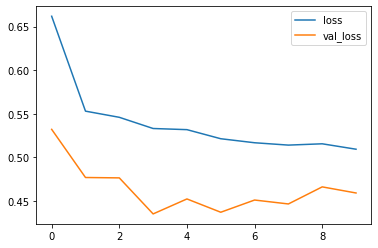

In [21]:
plt.plot(h.history['loss'],label='loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

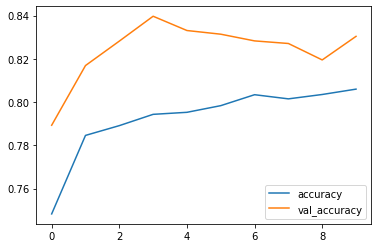

In [22]:
plt.plot(h.history['accuracy'],label='accuracy')
plt.plot(h.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [24]:
import cv2

In [41]:
img = cv2.imread(r"C:\Users\mukes\Desktop\Datasets\tee1.jfif")

In [42]:
img.shape

(3456, 2304, 3)

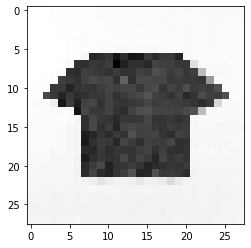

In [43]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
plt.imshow(img,cmap='gray')
plt.show()

In [44]:
img = img.reshape(1,28,28,1)
img = img/255

In [45]:
model.predict_classes(img)

array([0], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix


In [67]:
y_pred = model.predict_classes(xts)


In [68]:
print(confusion_matrix(y_true,y_pred))

[[816   0  10  21  17   1 126   0   9   0]
 [  0 962   1  27   6   0   2   0   2   0]
 [  6   0 574   5 318   0  92   0   5   0]
 [ 19   7   4 832 101   0  34   0   3   0]
 [  1   1  94  20 846   0  37   0   1   0]
 [  0   0   0   0   0 991   0   5   0   4]
 [177   0  87  24 219   0 475   0  18   0]
 [  0   0   0   0   0  94   0 888   0  18]
 [  1   0   1   2   8   3   6   4 975   0]
 [  0   0   0   0   0  13   0  42   0 945]]


(1, 24, 24, 40)
(1, 12, 12, 40)


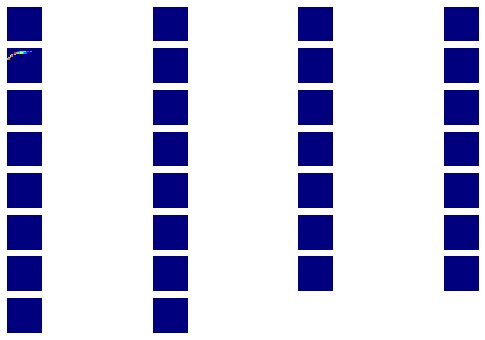

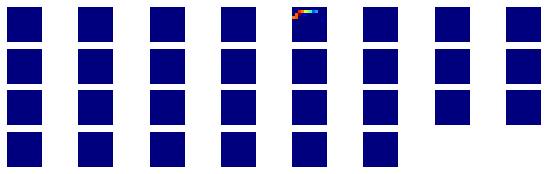

In [49]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)


#layer1
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(visual_layer1[0,:,:,i], cmap=plt.get_cmap('jet'))
    plt.axis("off")
    
#layer2
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(8,8,i+1)
    plt.imshow(visual_layer2[0,:,:,i], cmap=plt.get_cmap('jet'))
    plt.axis("off")
    

In [60]:
y_pred

NameError: name 'y_pred' is not defined